ST Assessment 9 (MedicalIns)

Group Members:
- Shah Genom Abdullah (u3239568@uni.canberra.edu.au)
- Ayman Ahmed (u3236372@uni.canberra.edu.au)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/ST1 MedicalIns Assessment 9

/content/drive/MyDrive/ST1 MedicalIns Assessment 9


In [ ]:
ls

DataForML.pkl  Medical_insurance.csv


# This assessment is based on the data avilable in Kaggle, the data is about the medical insurnace and contatins information such as charges (https://www.kaggle.com/datasets/harishkumardatalab/medical-insurance-price-prediction)
- It conttains the detials of 2772 medical insurnaces.
- My assessment is to create a AI or machine learning model that can predcit the avergae charge of medical insurance on characteristics such as charges, age, children, etc.
- To solve this task I will apoproach it step by step doing data analysis and using that data analysis to create a prediction model using AI or machine learning algorithms, avialbel from different Python packages, modules and classes.

# Step 1: Reading the data through the use of python
- We need to understand the data as well as the domain before we do anything with AI/machine learning algorithms. This is a very importent step in the process.

In [ ]:
#ignoring warning mesages
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#scanning the .csv containing data
import pandas as pd
import numpy as np
MedicalData=pd.read_csv('/content/drive/MyDrive/ST1 MedicalIns Assessment 9/Medical_insurance.csv', encoding='latin')
print('Shape before deleting duplicate values:', MedicalData.shape)


#removal of any duplicate rows to have more accurate data
MedicalData=MedicalData.drop_duplicates()
print('shape before deleting duplicate values:', MedicalData.shape)

#print the sample data at beginning rows
MedicalData.head(10)

Shape before deleting duplicate values: (2772, 7)
shape before deleting duplicate values: (1337, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


#Observations from teh above analysis
- The file we have imported contains 2772 medical insurance details but after deleting the duplicates there is only 1337 rows of data.
- There are only 7 attribuites (columns) which include: age,	sex,	charges (Body Mass Index),	children,	smoker,	region and	charges.
- The columns are easy to understand there for no futhur explination is need for them.

#Step 2: Definition of the problem statement
- Our problem statement is: creating a prediction model to predict the bmi (predictor variable) of individuals using medical insurance information.
- The target variables which are as uncluded: age, sex, children, smoker, region and charges.

# Choosing ML/AI Algorithm for Data Analysis.
- As the target variable is Continuous, we need to produce a adminstrative ML Regression agorithum based on the problem statement.

#Step 4: Class distribution analysis (Analysing the spread distribution of the target variable to ensure that the data is balanced and not skewed.
- This step is importent becuase if the distribution of the targeted variable is too skewed then the prediction algorithum will produce poor results
- The ideal distribtion is a bell curve but in situation a skew that is either slightly positive or negative skew is also accepted
- When executing a regression algorithm modelling and analysis, we need to make sure the histogram for the bmi is a bell curve or a skewed version of it.
- If it is not a bell curve than it effetcs the ability for the Machine Learning algorithm to learn scanrios from the data.

<Axes: >

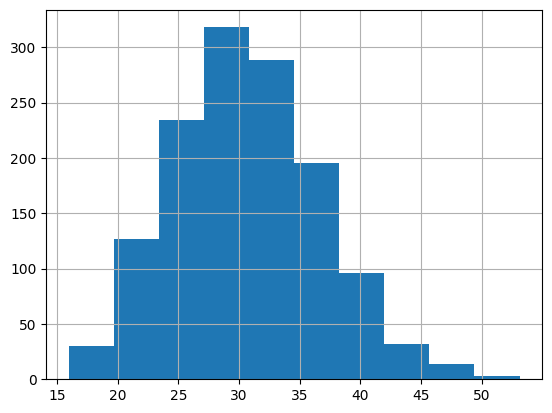

In [ ]:
%matplotlib inline
#creating histogram for BMI has it is a continuous variable
MedicalData['bmi'].hist()

#Observations from Step 4
- The above graph will help us to understand the distribution of the bmi values. We can clearly see thst is distrubuting as a bell curve.
- The distribution of the body mass indexbmi variable is more than good enough to proceed futher and there are more than enough number of data (rows) for each type of values to absorb from.

#Step 5: Exploratory Data Analysis
- This step needed to be executed to comprehand the overall data. Blow explain what we are trying to understand further:
- What are the different types of columns present in the data
- Understand which columns are Quantitative, conitnous or Categorical.
- This so we can assess if the column affects the Target variable
- Remove columns if they do not affect (bmi) or keep for further analysis
- The commends we are going to use for the basic data exploration analysis are listed below: head() this is used to see examples of the rows you can customise by putting how many row you wanna see in the prackets this is the same for all the below, info: info() this gives a summarised informaoitn fo all the data, describe() as the name suggests this gives the expressive statistical characteristics of the data, and last nunique() this helps us to identify weather a cloumn is categorical or continuous

In [ ]:
MedicalData.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
MedicalData.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
MedicalData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [ ]:
MedicalData.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337,1337.000000,1337.000000,1337,1337,1337.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,675,NaN,NaN,1063,364,NaN
mean,39.222139,NaN,30.663452,1.095737,NaN,NaN,13279.121487
std,14.044333,NaN,6.100468,1.205571,NaN,NaN,12110.359656
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.290000,0.000000,NaN,NaN,4746.344000
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9386.161300
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16657.717450


In [ ]:
MedicalData.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

# Step 5 observations - Basic Exploratory Data Analysis
- based on the infromation from the above code we will create a report below nothing down our obervations for each column
- This will help cread a road man for other analysis
- age - Continuous - Selected.
- sex - Categorical - Selected.
- bmi - Continuous - Selected. (This is the target variable which we will need to predict by using a regression model)
- children - Categorical - Selected.
- smoker - Categorical - Selected.
- reigon - Categorical - Selected.
- charges - Continuous - Selected.

#Step 7: Removing columns as they might be unwanted
- As there are not any Qualitative columns in the data there is no need to remove any columns

Step 8: Analysis of Visual Exploratory Data
- In this step we are going to visually distribute all the Categorical variables from the data-set through the use of bar plots charts
- We will identify categorical variable in the data through looking at each of the unique values in present in them.
- Categorical variables usually contain less than twenty unique values and there are also repretition present in these values, letting us group by those unique values.
- From our previous step we were able to spot a number of categorical columns.
- Categorical Predictors:
- 'sex',
- 'children'
- 'smoker'
- 'reigon'
- Using bar charts we will show the data distribution for these categorical collumns.


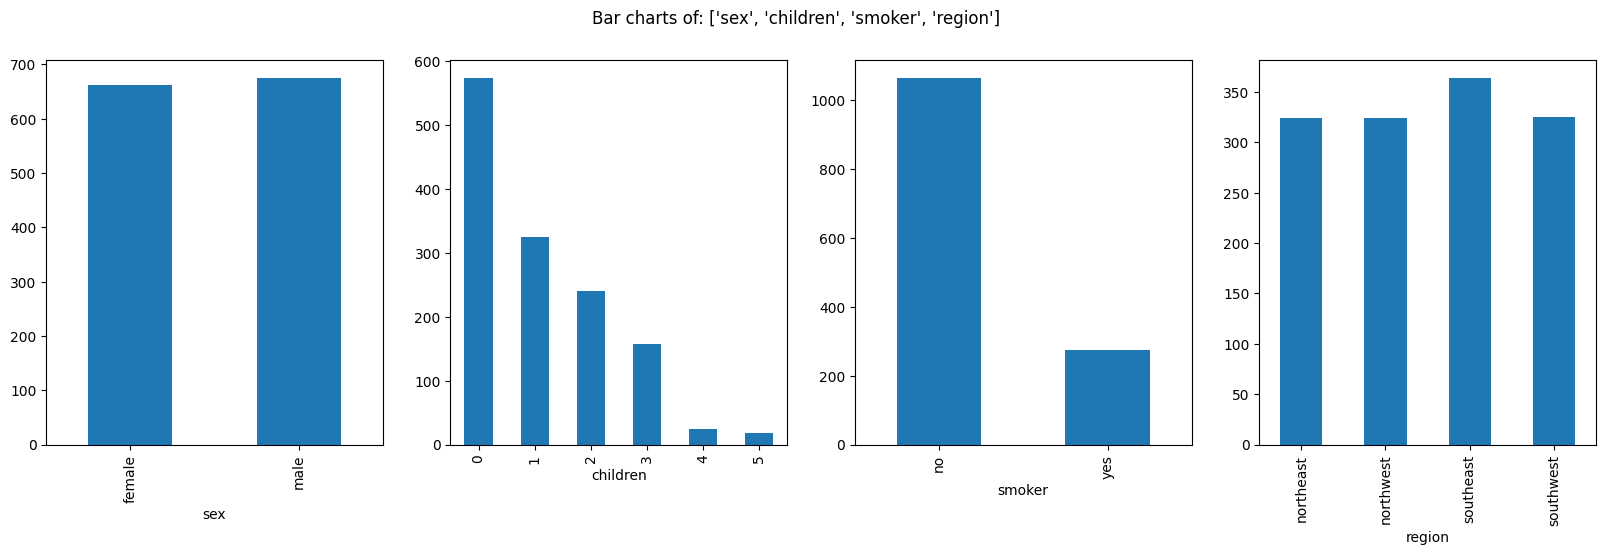

In [ ]:
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    import matplotlib.pyplot as plt

    #displaying plots for each categorical columns selected.
    fig, subPlot = plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: ' + str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar', ax=subPlot[plotNumber])

PlotBarCharts(inpData=MedicalData, colsToPlot=['sex', 'children', 'smoker', 'region'])

# Observations from Step 8 - Visual Exploratory Data Analysis
- Bar charts all the interprestaion of the 4 columns
- In the Y-axies we are able to observe the frequencies of each cataogry and in the X-axies we are able to see the names.
- In the above bar charts there does not seem to be skewed distributions where one column is higher than the rest.
- We do not want this as these coulmns are not very helpful when we are using machine learning
- We are not making out final decision on here as in the coming up steps we will use correlation analysis to either select or reject cloumns
- It is worth mentioning that in this data set for column 'children' the graph may be a little skewed, where there is the 0 bar dominaitng the rest of the others. As there is no informaiton to learn form such values s, there may not be any correlated with the target variable. Meaning the ML/AI algotithms cannot find any rule to assoicate for example if value is this than the target will have to be that.
- Selected:('sex','children', 'smoker', 'reigon')
- More analysis will be done in the correlation section

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

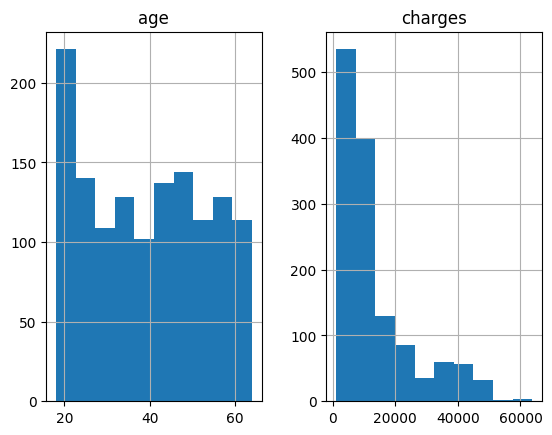

In [ ]:
MedicalData.hist(['age', 'charges'])

# Observations from Step 9: Visualising distribution and spread of all the Continuous Predictor variables which are present in the data through the use of histograms

- like we did for bmi at the begining each histogram shows the distribution and the spread of data for a single continuous variable.
- The Y-axies show us the number of variables in that rage and the X-axies show us the range of the variables.
- For example in the 'charges' column the data seem to be skewed with 400 or more rows of data are present between 0 and 20,000.

- Same as from the 'bmi' section the ideal distribution is a bell curve, if the data is skewed than that column need to be removed.

- We will do futhur analysis before removing the clumns.

- The final selection of columns include: 'age', 'charges'












Step 10: Outlier Analysis
- We can see outliers as the tails in the histogram as they are distent from most of the othe data
- They need to be fixed one cloumn at a time, as the solution for each column may gradually differentiate
- We need to analyse outliers it provides bias for ML/AI models.
- the two ways of treating outliers is either by deleting it or with a logical busniess value.

As we can see, there are no missing values from any of our variables. Therefore, we can proceed without any treatment.

# Step 12: Missing Values Analysis


- The missing values of each column are treated separately.
- Threshold for Missing Data: If a column has missing data more than 30%, it will be useless to apply the missing value treatment.
- Treatment to Missing Value:
Deletion of Records : If missing the value is in the observation, and the data missing values are small, the data can be deleted. It is practical because the overall data lost is small and there are a lot of data and dropping the deleting would not make much difference.
- Imputation with Median: Missing value can be imputed by the median of the attribute if it has a continuous value missing .
- It helps to maintain the central tendency of the variable
- Outliers do not affect the median .
- Imputation with Mode: Missing value can be imputed by the mode of the attribute if it has a categorical value missing .
- It maintains the outliers if there are any.
- Interpolation is a method of estimating values between two known values. If some of the data are missing, the missing data could be filled by relating them to the nearby values from the data. Then, by applying interpolation which uses between the values, the missed value could be calculated. In the interpolation, there is various way of implementing it, such as linear interpolation or spline interpolation .
- Business Logic Interpolation: based on business lofic we can inter polate the values.

In [ ]:
#finding the amout of values that are missing for each data column
MedicalData.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#Observations from Step 12:
- There are no missing values in the data, therefore no data samples (rows) need to be removed.

# Step 12: Feature Selection (Attribute Selection)
- Now we are going to choose the best columns (Features) which are correlated to the Target variable. This can be done by direclty measuring the correlation values or ANOVA test analysis or Chi square tests.
- To get a better sense of the of data it is always better to visualise the realtion between the target variable and each of the predicoters.
- Below are some of the techinques we can use:
**- Statistical measurement of relationship strength between variables**
- Continuous Vs Continuous (Correlation matrix)
- Categorical Vs Continuous (ANOVA test)
- Categorical Vs Categorical (Chi-Square test)
**- Visual exploration of relationship between variables**
- Continuous Vs Continuous (Scatter Plot)
- Categorical Vs Continuous (Box Plot)
- Categorical Vs Categorical (Grouped Bar Plots)
- For this dataset, the Target variable is - Continuous, therefore following two scenarios will need attention:
- Continuous Target Variable Vs Continuous Predictor
- Continuous Target Variable Vs Categorical Predictor

# Exploration of relationships for continuous vs continuous using scatter charts
- As the target variable is continuous and the predictor varitable is continuous we are going to visualize the relationship between the two of them through the use of scatter plot which will allow us to measure the stength of the relationship using a metric which is called "pearson's correlation value"

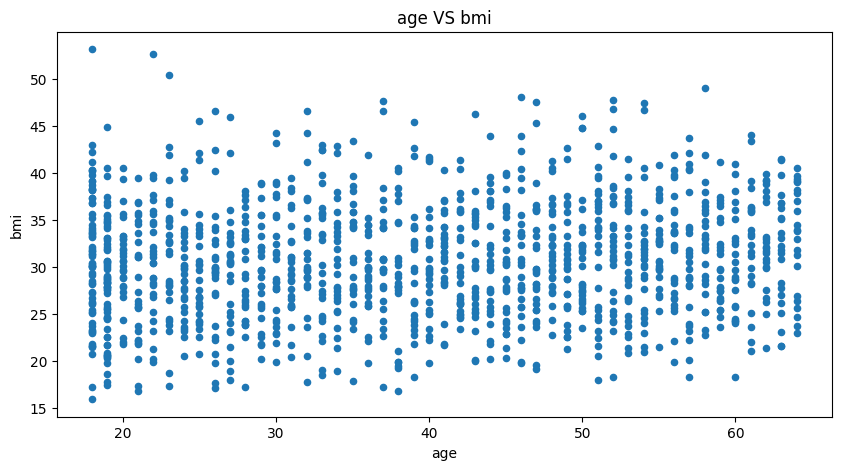

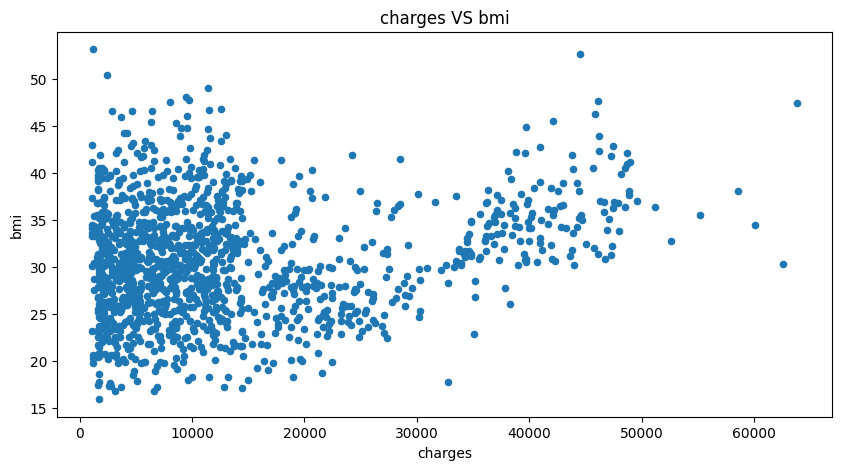

In [ ]:
ContinuousCols=['age', 'charges']

#plotting scatter chart for each predictor column vs bmi
for predictor in ContinuousCols:
    MedicalData.plot.scatter(x=predictor, y='bmi', figsize=(10,5), title=predictor+" VS "+ 'bmi')

#Scatter charts trends
- The age against bmi chart does not seem to have any trends, the chart is basically filled out evenly with some minor points standing out but those are not relevent.
- The charges against bmi chart seem to almost have a positive trent where it is increasing but there isd also a huge number of data which is on the left side.
- For both charts we need to understand that there are dublicates and extremes which may affect how the data loooks there for we are not making out final decision from this we are going to futher explore the data using the equation mentioned before.

#Step 14: Continuous Vs Continuous using Correlation value
- We will use Pearson's correlation coefficient as a power metric for this section
- Below photo describes the equation as the covariance between two factors x and y divided by the product fo thier standerd deviations

 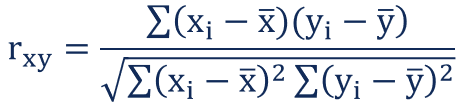

- This value is calcuated between two numeric colums
- We observe the correlation between the predicoter varible and the target varible to see weather columns actullay have any realtion to the target variable

In [ ]:
#calculating correlation matrix
ContinuousCols=['bmi', 'age', 'charges']

#creation of the correlation matrix
CorrelationData=MedicalData[ContinuousCols].corr()
CorrelationData

,bmi,age,charges
bmi,1.000000,0.109344,0.198401
age,0.109344,1.000000,0.298308
charges,0.198401,0.298308,1.000000


In [ ]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable

CorrelationData['bmi'][abs(CorrelationData['bmi']) > 0.5]

bmi    1.0
Name: bmi, dtype: float64

Conclusion from step 14
- No value was chosen initially as it did not meet the 0.5, therefore the threshold was reduced to 0.1

In [ ]:
CorrelationData['bmi'][abs(CorrelationData['bmi']) > 0.1]

bmi        1.000000
age        0.109344
charges    0.198401
Name: bmi, dtype: float64

#Step 15: exploring the relationship between the: Categorical Vs Continuous -- Box Plots
- As the target variable is Continuous and the predictor variable is Categorical we can analyse the realtion using bosplots
- We also use the Anova test to measure the strngth of the realtion

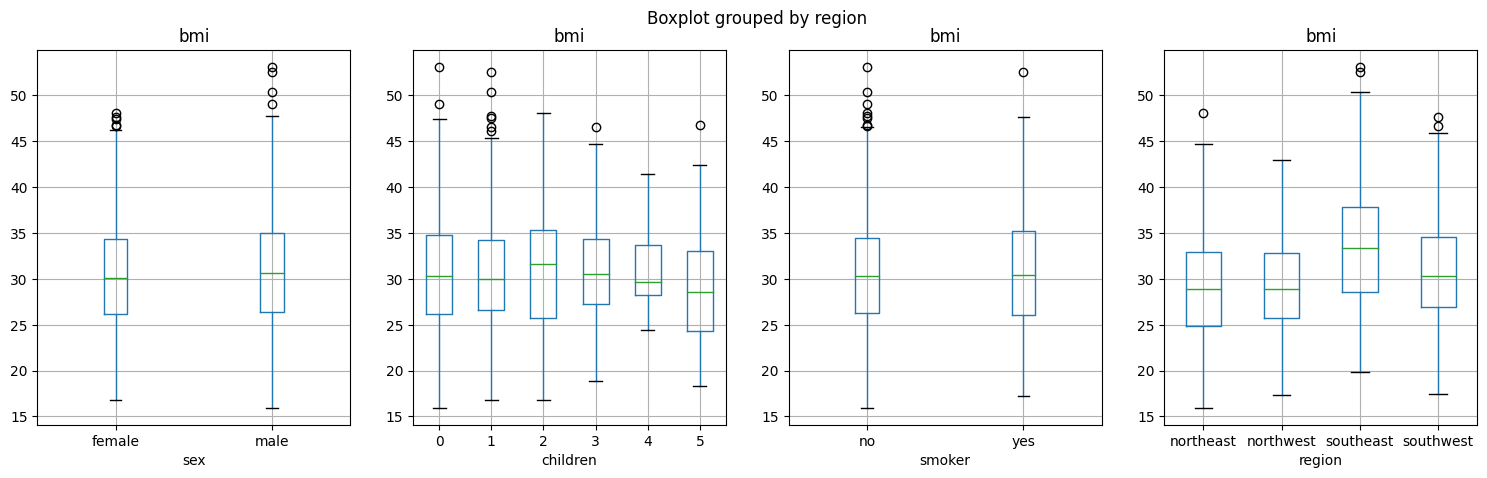

In [ ]:
#box plots for bmi and categorical predictors
CategoricalColsList=['sex', 'children', 'smoker', 'region']
import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))
#generste box plots for each predictor against bmi
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    MedicalData.boxplot(column='bmi', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

Observations from Step 15: Box-Plots interpretation
- What should you look for in these box plots?
- These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.
- If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the
target variable. Hence, the variables are not correlated to each other.
- On the other hand if the distribution is different for each category(the boxes are not in same line!). It hints that these variables might be
correlated with MEDV.
- For this datadata, both the categorical predictors looks correlated with the Target variable.
We confirm this by looking at the results of ANOVA test below



# Step 16: ANOVA test (Categorical Vs Continuous)
- We use the Analysis of variance (ANOVA) to check if there is any relationship betwen the given continous and categorical variable.
- Assumption(H0) Null Hypothesis: the given variables have no relationship
- The average(mean) values of the numeric Target variable is same for all the groups in the categorical Predictr variable)


In [ ]:
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway
    #empty list to store final predictor variables
    SelectedPredictors=[]
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        #if the ANOVA value is less than 0.05, that means it is correlated with BMI, else it is not
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    return(SelectedPredictors)

#calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['age', 'charges']
FunctionAnova(inpData=MedicalData,
              TargetVariable='bmi',
              CategoricalPredictorList=CategoricalPredictorList)


##### ANOVA Results ##### 

sex is NOT correlated with bmi | P-Value: 0.08991704324920163
children is NOT correlated with bmi | P-Value: 0.8830491274520269
smoker is NOT correlated with bmi | P-Value: 0.8911471317224385
region is correlated with bmi | P-Value: 1.9087293927440606e-24


['region']

#Observations from Step 16
- only the region is correlated with the target variable. As we cannot only use one column for our AI/ML model we are going to pick more coumns by lower 0.05 and as all the other columns are have similir ANOVA results we are going to picl all the cloumns.
- Final selected Categorical columns:
- 'sex', 'children', 'smoker', 'region'

# Selecting the final Predictors/Features for building ML/AI model.
- Based on out tests with exploraotry data, the final slection for columns include: 'charges','age', 'sex','children', 'smoker', 'region'

In [ ]:
SelectedColumns=['charges','age', 'sex','children', 'smoker', 'region']

#selecting final predictor columns
DataForML=MedicalData[SelectedColumns]
DataForML.head()

,charges,age,sex,children,smoker,region
0,16884.92400,19,female,0,yes,southwest
1,1725.55230,18,male,1,no,southeast
2,4449.46200,28,male,3,no,southeast
3,21984.47061,33,male,0,no,northwest
4,3866.85520,32,male,0,no,northwest


In [ ]:
#saving data
DataForML.to_pickle('DataForML.pkl')

# Step 17: Data processing for Machine Learning Model Building or Model Development
- below are list of steps that needs to be performed on predictor variables before we can use it for machine learning or AI.
- Convert each Ordinal Categorical data to numeric
- Convert Binary nominal Categorical data to numeric through 1/0 mapping
- Convert all other nominal categorical data to numeric through th use of pd.get_dummies()
- Data Transformation (Optional): Standardisation/Normalisation/log/sqrt. Important if we are using distance based algorithms like KNN,
or Neural Networks
- Convert the ordinal variable to numeric - In this data there is no Ordinal categorical variable.
- Convert the binary nominal variable to numeric through 1/0 mapping: There is no binary nominal variable in string format in this


In [ ]:
#converting variables to numeric value for data processing
DataForML_Numeric=pd.get_dummies(DataForML)

#adding bmi to the above data
DataForML_Numeric['bmi']=MedicalData['bmi']

#printing sample rows
DataForML_Numeric.head()

,charges,age,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,bmi
0,16884.92400,19,0,True,False,False,True,False,False,False,True,27.900
1,1725.55230,18,1,False,True,True,False,False,False,True,False,33.770
2,4449.46200,28,3,False,True,True,False,False,False,True,False,33.000
3,21984.47061,33,0,False,True,True,False,False,True,False,False,22.705
4,3866.85520,32,0,False,True,True,False,False,True,False,False,28.880


## Step 18: Machine Learning Model Development:
- In this part we will split the data into traning and testing smaple
- Not the full data will be used to create the the model some will be used a traning data
- We will use around 70% of the data for training and the remaning 30% for testing

In [ ]:
#printing all names of columns
DataForML_Numeric.columns

Index(['charges', 'age', 'children', 'sex_female', 'sex_male', 'smoker_no',
       'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest', 'bmi'],
      dtype='object')

In [ ]:
#defining the target and predictor variables
TargetVariable='bmi'
Predictors=['charges', 'age', 'children', 'sex_female', 'sex_male', 'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

#import training from sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

# Step 19: The standardisation and Normalisation of data
- We did not have to do this as we are not using KNN or Neural Netwroks, but we wanted to compare the resulttant accuracuy of this treansformation with the accuracy of raw data

In [ ]:
### Standardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(935, 11)
(935,)
(402, 11)
(402,)


## Step 20: Multiple Linear Regression Algorithm For ML/AI model building

# Random Forest Regressor

RandomForestRegressor(criterion='friedman_mse', max_depth=4, n_estimators=400)
R2 Value: 0.27249035911636266


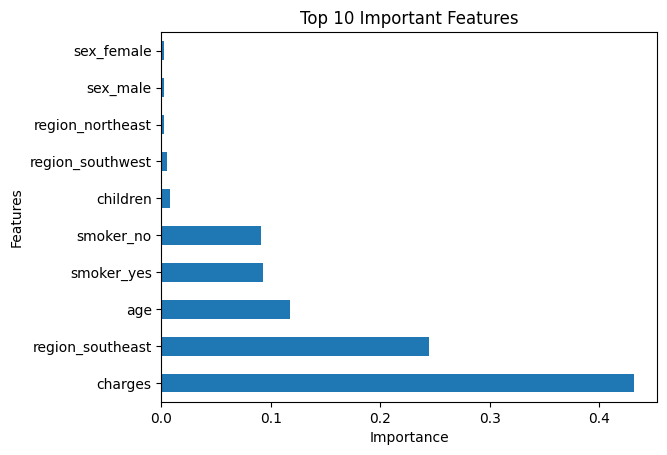


##### Model Validation and Accuracy Calculations ##########
    charges       age  children  sex_female  sex_male  smoker_no  smoker_yes  \
0  0.120785  0.673913       0.0         0.0       1.0        1.0         0.0   
1  0.073218  0.239130       0.8         1.0       0.0        1.0         0.0   
2  0.164646  0.717391       0.6         1.0       0.0        1.0         0.0   
3  0.600564  0.282609       0.6         0.0       1.0        0.0         1.0   
4  0.053335  0.282609       0.4         0.0       1.0        1.0         0.0   

   region_northeast  region_northwest  region_southeast  region_southwest  \
0               1.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               1.0   
2               0.0               1.0               0.0               0.0   
3               0.0               1.0               0.0               0.0   
4               0.0               0.0               1.0               0.0

In [ ]:
# Importing necessary libraries for the model
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Initialising (basic settings) the Random Forest Regressor with specific parameters
RegModel = RandomForestRegressor(max_depth=4, n_estimators=400, criterion='friedman_mse')
# max_depth limits the depth of the trees in the forest to prevent overfitting
# n_estimators sets the number of trees in the forest
# criterion 'friedman_mse' is used for measuring the quality of a split
# 4, 400 and friedman_mse =  balance the model complexity, performacne and effiency

# Displaying all the parameters of the RandomForestRegressor to check configuration
print(RegModel)

# Fitting the model on training data
RF = RegModel.fit(X_train, y_train)
# RF now contains the trained Random Forest model

# Making predictions using the trained model on the test dataset
prediction = RF.predict(X_test)

# Measurring the R-squared value on the training data to evaluate the fit
print('R2 Value:', metrics.r2_score(y_train, RF.predict(X_train)))

# Plotting the individual variables importance for the top ten most influential predictors
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Model Validation and Accuracy Checks
print('\n##### Model Validation and Accuracy Calculations ##########')

# Creating a DataFrame with test data predictions and actual data for comparison
TestingDataResults = pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable] = y_test
TestingDataResults['Predicted' + TargetVariable] = np.round(prediction)

# Displaying first few rows of predictions to verify against actuals
print(TestingDataResults.head())

# Calculating the Absolute Percentage Error for each prediction
TestingDataResults['APE'] = 100 * (abs(TestingDataResults[TargetVariable] - TestingDataResults['Predicted' + TargetVariable]) / TestingDataResults[TargetVariable])

# Calculating the Mean and Median Absolute Percentage Error
MAPE = np.mean(TestingDataResults['APE'])
MedianMAPE = np.median(TestingDataResults['APE'])

# Calculating Accuracy based on MAPE
Accuracy = 100 - MAPE
MedianAccuracy = 100 - MedianMAPE
print('Mean Accuracy on test data:', Accuracy)  # Note: Can be negative due to outliers
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom scoring function to calculate Mean Absolute Percentage Error (MAPE)
def Accuracy_Score(orig, pred):
    MAPE = np.mean(100 * (np.abs(orig - pred) / orig))
    return 100 - MAPE

# Using custom scoring function with cross-validation
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

custom_Scoring = make_scorer(Accuracy_Score, greater_is_better=True)
Accuracy_Values = cross_val_score(RegModel, X, y, cv=10, scoring=custom_Scoring)

# Displaying the results of the 10-fold cross-validation
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(), 2))

# Step 21: Model Deployment
* Deployment of the Model - Based on the above trials we select that algorithm which produces the best average accuracy.

* In this case, multiple algorithms have produced similar kind of average accuracy. Hence, we can choose any one of them.

* I am choosing XGboost as the final model it has the highest accuracy!

* In order to deploy the model we follow steps outlined next.

* Train/Build the model again using 100% data available

* Save the model as a serialized file which can be stored anywhere.

* Create a python function which gets integrated with front-end Viewer(GUI/ Website etc.) to take all the inputs and returns the prediction

* Choosing only the most important variables

* Its beneficial to keep lesser number of predictors for the model while deploying it in production.

* The lesser predictors you keep, the better it is, because the model will be less dependent on predictor columns/features, hence, more stable.

* This is important specially when the data is high dimensional(too many predictor columns/features).

* For this dataset, the most important predictor variables are 'LSTAT', 'RM', and 'PTRATIO'. As these are consistently on top of the variable importance chart for every algorithm. Hence choosing these as final set of predictor variables will result in better house price prediction platform/system.

In [ ]:
# Separate Target Variable and Predictor Variables
TargetVariable='charges'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['charges', 'age', 'children', 'sex_female', 'sex_male', 'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(1337, 11)
(1337,)


# Cross validating the final model accuracy with less predictors

In [ ]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# choose from different tunable hyper parameters
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting One of the Decision Tree in Random Forest Regressor

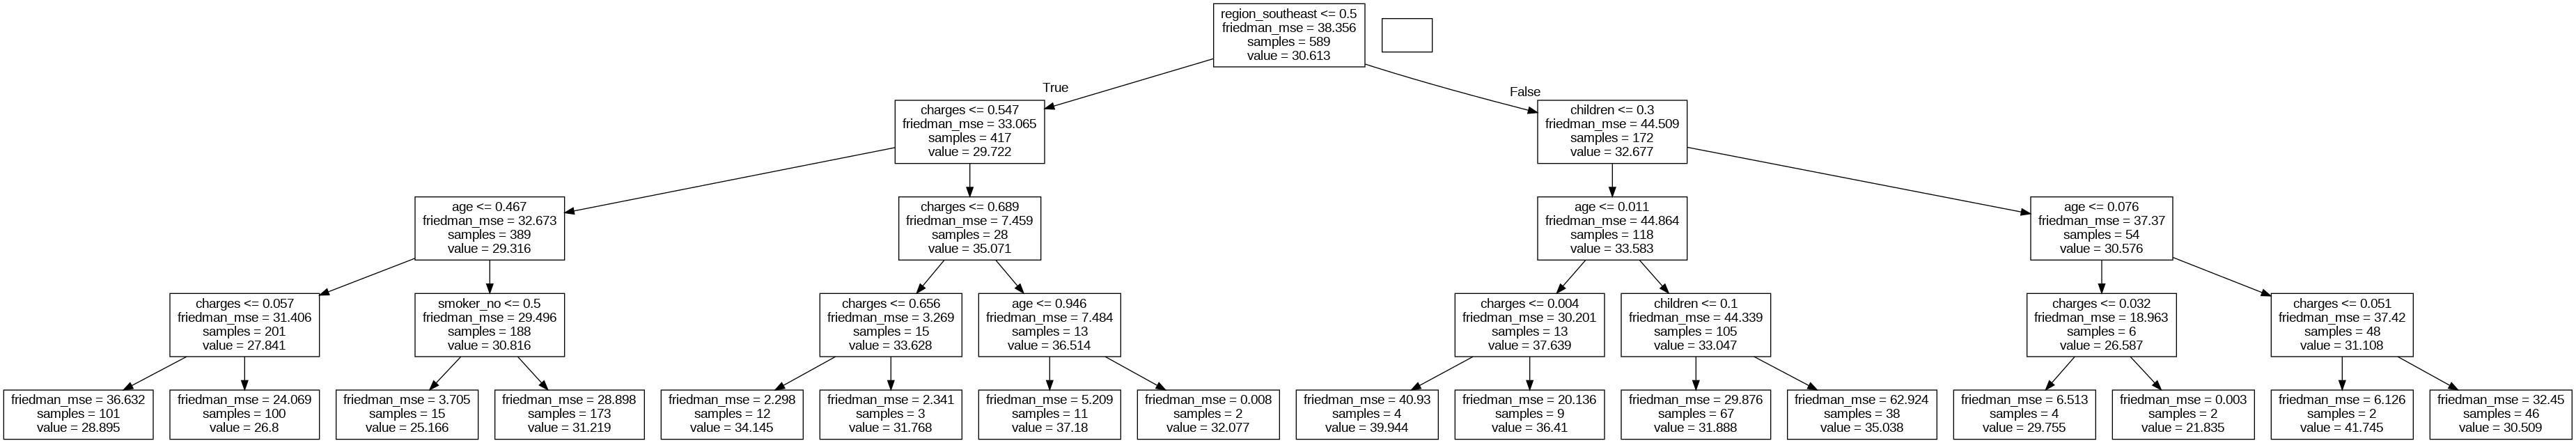

In [ ]:
#import libraries
from IPython.display import Image
from sklearn import tree
import pydotplus
#creating DOT data for the 4th decison tree
dot_data = tree.export_graphviz(RegModel.estimators_[3] , out_file=None, feature_names=Predictors, class_names=TargetVariable)

#generate graph
graph = pydotplus.graph_from_dot_data(dot_data)
#disply graph
Image(graph.create_png())


# AI/ML model compersion
- Below are the final average accuracy of the model:
- Linear Regression: 57.44
- Decision Tree Regressor: 83.25
- Random Forest Regressor: 85.49
- AdaBoost Algorithm: 38.63
- XGBoost Regressor: 78.8
- K-Nearest Neighbor: 70.01
- Support Vector Machine (SVM) Regressor: -0.43
- As we can see Random Forest Regressor has the higest final average accuracy therefore we picked that model.